## Required Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_covtype

def load_and_inspect_covertype():
    """
    Fetches the Covertype dataset from scikit-learn and provides a brief inspection.
    """
    print("--- Fetching the Covertype Dataset ---")

    try:
        # fetch_covtype() downloads the dataset and caches it.
        # It returns a Bunch object, which is a dictionary-like object.
        covtype_data = fetch_covtype()

        # Print the detailed description of the dataset.
        # This includes information about the features, target, and data source.
        print("\n--- Dataset Description ---")
        print(covtype_data.DESCR)

        # The feature data is stored in the 'data' attribute.
        X = pd.DataFrame(covtype_data.data, columns=covtype_data.feature_names)

        # The target variable (Cover_Type) is in the 'target' attribute.
        y = pd.Series(covtype_data.target, name="Cover_Type")

        # Display the first 5 rows of the feature data.
        print("\n--- Features (First 5 rows) ---")
        print(X.head())

        # Display the first 5 rows of the target data.
        print("\n--- Target (First 5 rows) ---")
        print(y.head())

        # Display the shape of the features and target data.
        print("\n--- Dataset Shape ---")
        print(f"Features shape: {X.shape}")
        print(f"Target shape: {y.shape}")

        # Return the data and target for further use, e.g., model training
        return X, y

    except Exception as e:
        print(f"An error occurred while fetching the dataset: {e}")
        return None, None

if __name__ == "__main__":
    # Call the function to load and inspect the dataset
    features, target = load_and_inspect_covertype()
    
    if features is not None and target is not None:
        print("\nDataset successfully loaded and ready for use!")

--- Fetching the Covertype Dataset ---

--- Dataset Description ---
.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and th

In [4]:
# Load the dataset and create a single DataFrame named df
print("Creating single DataFrame 'df'...")

# Call the function to get features and target
features, target = load_and_inspect_covertype()

if features is not None and target is not None:
    # Combine features and target into a single DataFrame named df
    df = pd.concat([features, target], axis=1)
    
    print("\n=== SINGLE DATAFRAME 'df' CREATED ===")
    print(f"DataFrame shape: {df.shape}")
    print(f"Total columns: {len(df.columns)}")
    print(f"Total rows: {len(df)}")
    
    print("\n--- Column Names ---")
    print(df.columns.tolist())
    
    print("\n--- First 5 rows of df ---")
    print(df.head())
    
    print("\n--- Data Types ---")
    print(df.dtypes)
    
    print("\n--- Basic Statistics ---")
    print(df.describe())
    
    print("\n--- Target (Cover_Type) Distribution ---")
    print(df['Cover_Type'].value_counts().sort_index())
    
    print("\n--- Missing Values Check ---")
    missing_values = df.isnull().sum().sum()
    print(f"Total missing values: {missing_values}")
    
    print(f"\n🎉 DataFrame 'df' is ready for analysis!")
    print(f"Your forest cover dataset with {len(df)} records and {len(df.columns)} features is now available as 'df'")
    
else:
    print("❌ Failed to load the dataset. Please check the error above.")

Creating single DataFrame 'df'...
--- Fetching the Covertype Dataset ---

--- Dataset Description ---
.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature ma

## Statistical Analysis and Visualization

In [11]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


In [13]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [6]:
df.tail()



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581011,2383.0,165.0,13.0,60.0,4.0,67.0,231.0,244.0,141.0,875.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
df.mean()

Elevation                             2959.365301
Aspect                                 155.656807
Slope                                   14.103704
Horizontal_Distance_To_Hydrology       269.428217
Vertical_Distance_To_Hydrology          46.418855
Horizontal_Distance_To_Roadways       2350.146611
Hillshade_9am                          212.146049
Hillshade_Noon                         223.318716
Hillshade_3pm                          142.528263
Horizontal_Distance_To_Fire_Points    1980.291226
Wilderness_Area_0                        0.448865
Wilderness_Area_1                        0.051434
Wilderness_Area_2                        0.436074
Wilderness_Area_3                        0.063627
Soil_Type_0                              0.005217
Soil_Type_1                              0.012952
Soil_Type_2                              0.008301
Soil_Type_3                              0.021335
Soil_Type_4                              0.002749
Soil_Type_5                              0.011316


In [10]:
df.median()

Elevation                             2996.0
Aspect                                 127.0
Slope                                   13.0
Horizontal_Distance_To_Hydrology       218.0
Vertical_Distance_To_Hydrology          30.0
Horizontal_Distance_To_Roadways       1997.0
Hillshade_9am                          218.0
Hillshade_Noon                         226.0
Hillshade_3pm                          143.0
Horizontal_Distance_To_Fire_Points    1710.0
Wilderness_Area_0                        0.0
Wilderness_Area_1                        0.0
Wilderness_Area_2                        0.0
Wilderness_Area_3                        0.0
Soil_Type_0                              0.0
Soil_Type_1                              0.0
Soil_Type_2                              0.0
Soil_Type_3                              0.0
Soil_Type_4                              0.0
Soil_Type_5                              0.0
Soil_Type_6                              0.0
Soil_Type_7                              0.0
Soil_Type_

In [14]:
df.mode()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2968.0,45.0,11.0,30.0,0.0,150.0,226.0,228.0,143.0,618.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [15]:
df.std()

Elevation                              279.984734
Aspect                                 111.913721
Slope                                    7.488242
Horizontal_Distance_To_Hydrology       212.549356
Vertical_Distance_To_Hydrology          58.295232
Horizontal_Distance_To_Roadways       1559.254870
Hillshade_9am                           26.769889
Hillshade_Noon                          19.768697
Hillshade_3pm                           38.274529
Horizontal_Distance_To_Fire_Points    1324.195210
Wilderness_Area_0                        0.497379
Wilderness_Area_1                        0.220882
Wilderness_Area_2                        0.495897
Wilderness_Area_3                        0.244087
Soil_Type_0                              0.072039
Soil_Type_1                              0.113066
Soil_Type_2                              0.090731
Soil_Type_3                              0.144499
Soil_Type_4                              0.052356
Soil_Type_5                              0.105775


In [16]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


=== ELEVATION vs COVER TYPE ANALYSIS ===


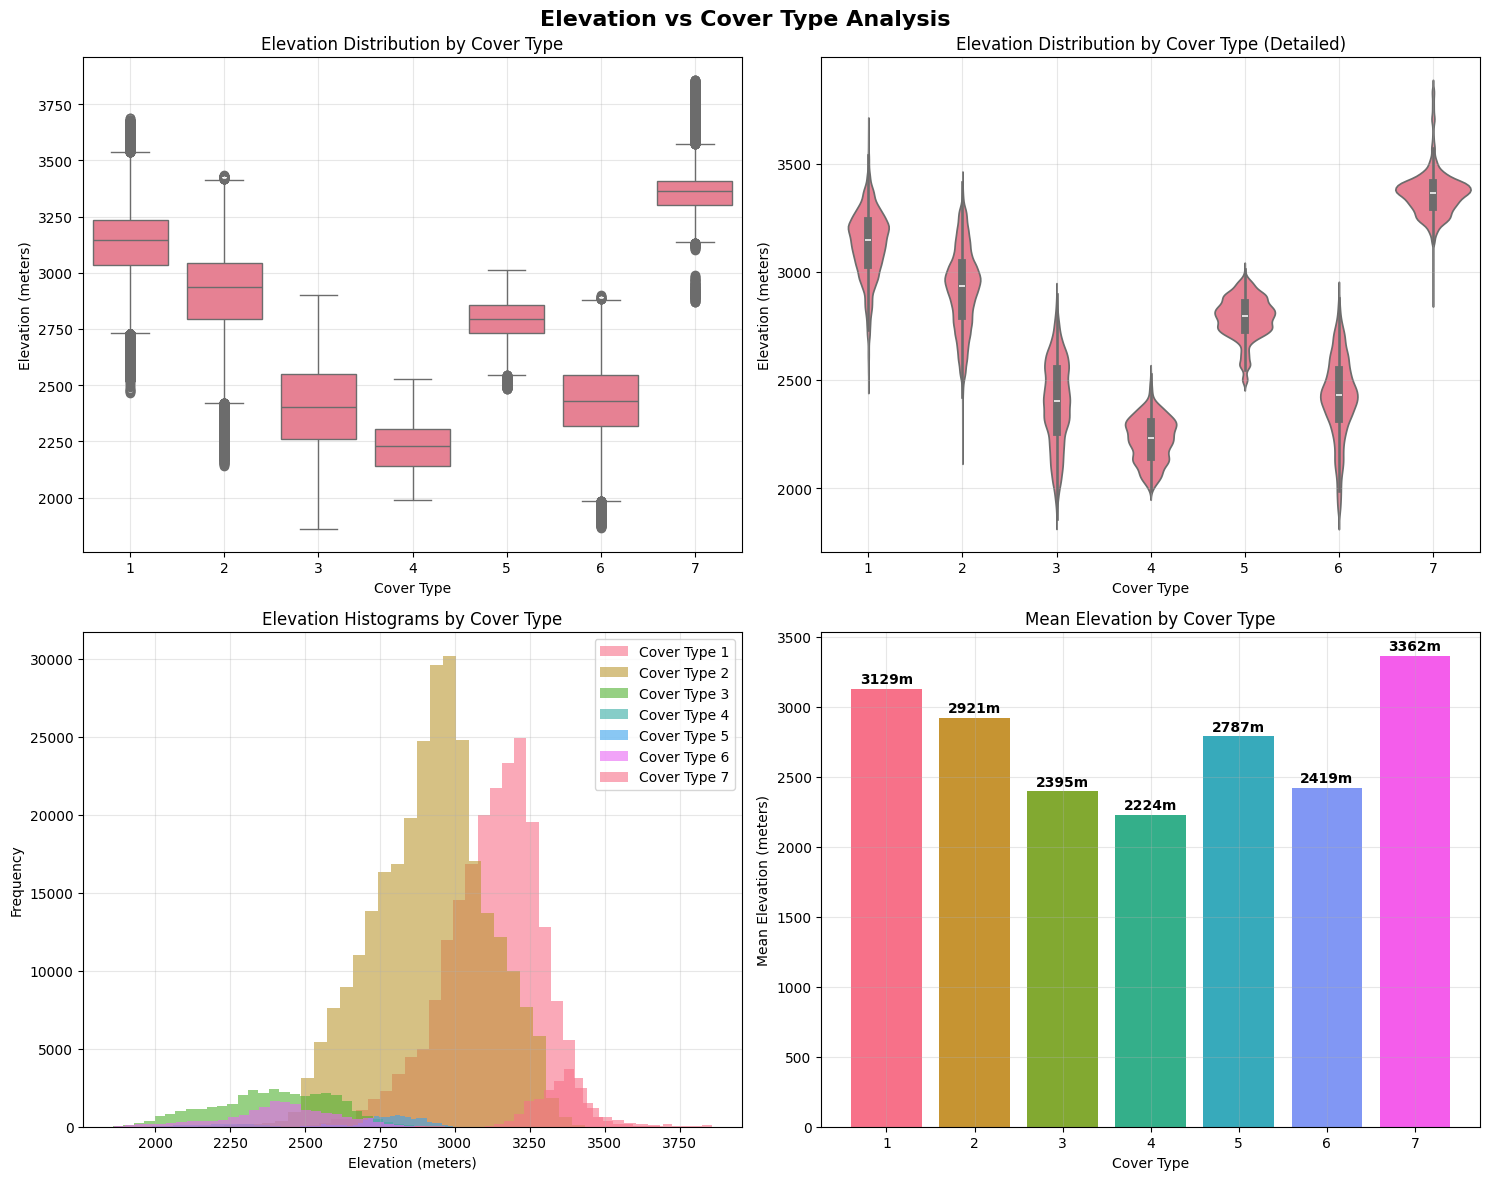


=== STATISTICAL SUMMARY ===
Elevation statistics by Cover Type:
             count     mean     std     min     max
Cover_Type                                         
1           211840  3128.64  157.81  2466.0  3686.0
2           283301  2920.94  186.58  2142.0  3433.0
3            35754  2394.51  196.73  1859.0  2899.0
4             2747  2223.94  102.52  1988.0  2526.0
5             9493  2787.42   96.59  2482.0  3011.0
6            17367  2419.18  188.76  1863.0  2900.0
7            20510  3361.93  106.92  2868.0  3858.0

=== ELEVATION RANGES ===
Cover Type 1: 2466m - 3686m (Mean: 3129m)
Cover Type 2: 2142m - 3433m (Mean: 2921m)
Cover Type 3: 1859m - 2899m (Mean: 2395m)
Cover Type 4: 1988m - 2526m (Mean: 2224m)
Cover Type 5: 2482m - 3011m (Mean: 2787m)
Cover Type 6: 1863m - 2900m (Mean: 2419m)
Cover Type 7: 2868m - 3858m (Mean: 3362m)

Correlation between Elevation and Cover Type: -0.270
📊 Moderate relationship detected between elevation and cover type


In [ ]:
# Plot relationship between Elevation and Cover Type


print("=== ELEVATION vs COVER TYPE ANALYSIS ===")

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Elevation vs Cover Type Analysis', fontsize=16, fontweight='bold')

# 1. Box Plot - Distribution of elevation for each cover type
axes[0, 0].set_title('Elevation Distribution by Cover Type')
sns.boxplot(data=df, x='Cover_Type', y='Elevation', ax=axes[0, 0])
axes[0, 0].set_xlabel('Cover Type')
axes[0, 0].set_ylabel('Elevation (meters)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Violin Plot - More detailed distribution view
axes[0, 1].set_title('Elevation Distribution by Cover Type (Detailed)')
sns.violinplot(data=df, x='Cover_Type', y='Elevation', ax=axes[0, 1])
axes[0, 1].set_xlabel('Cover Type')
axes[0, 1].set_ylabel('Elevation (meters)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram with overlay - Elevation distribution for each cover type
axes[1, 0].set_title('Elevation Histograms by Cover Type')
for cover_type in sorted(df['Cover_Type'].unique()):
    subset = df[df['Cover_Type'] == cover_type]
    axes[1, 0].hist(subset['Elevation'], alpha=0.6, label=f'Cover Type {cover_type}', bins=30)
axes[1, 0].set_xlabel('Elevation (meters)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Mean elevation by cover type (bar plot)
axes[1, 1].set_title('Mean Elevation by Cover Type')
mean_elevation = df.groupby('Cover_Type')['Elevation'].mean()
bars = axes[1, 1].bar(mean_elevation.index, mean_elevation.values, 
                      color=sns.color_palette("husl", len(mean_elevation)))
axes[1, 1].set_xlabel('Cover Type')
axes[1, 1].set_ylabel('Mean Elevation (meters)')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 20,
                    f'{height:.0f}m', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n=== STATISTICAL SUMMARY ===")
print("Elevation statistics by Cover Type:")
elevation_stats = df.groupby('Cover_Type')['Elevation'].agg(['count', 'mean', 'std', 'min', 'max'])
print(elevation_stats.round(2))

# Find elevation ranges for each cover type
print("\n=== ELEVATION RANGES ===")
for cover_type in sorted(df['Cover_Type'].unique()):
    subset = df[df['Cover_Type'] == cover_type]
    min_elev = subset['Elevation'].min()
    max_elev = subset['Elevation'].max()
    mean_elev = subset['Elevation'].mean()
    print(f"Cover Type {cover_type}: {min_elev:.0f}m - {max_elev:.0f}m (Mean: {mean_elev:.0f}m)")

# Correlation analysis
correlation = df['Elevation'].corr(df['Cover_Type'])
print(f"\nCorrelation between Elevation and Cover Type: {correlation:.3f}")

if abs(correlation) > 0.3:
    print("🔍 Strong relationship detected between elevation and cover type!")
elif abs(correlation) > 0.1:
    print("📊 Moderate relationship detected between elevation and cover type")
else:
    print("📈 Weak relationship between elevation and cover type")

=== ELEVATION vs SLOPE ANALYSIS ===


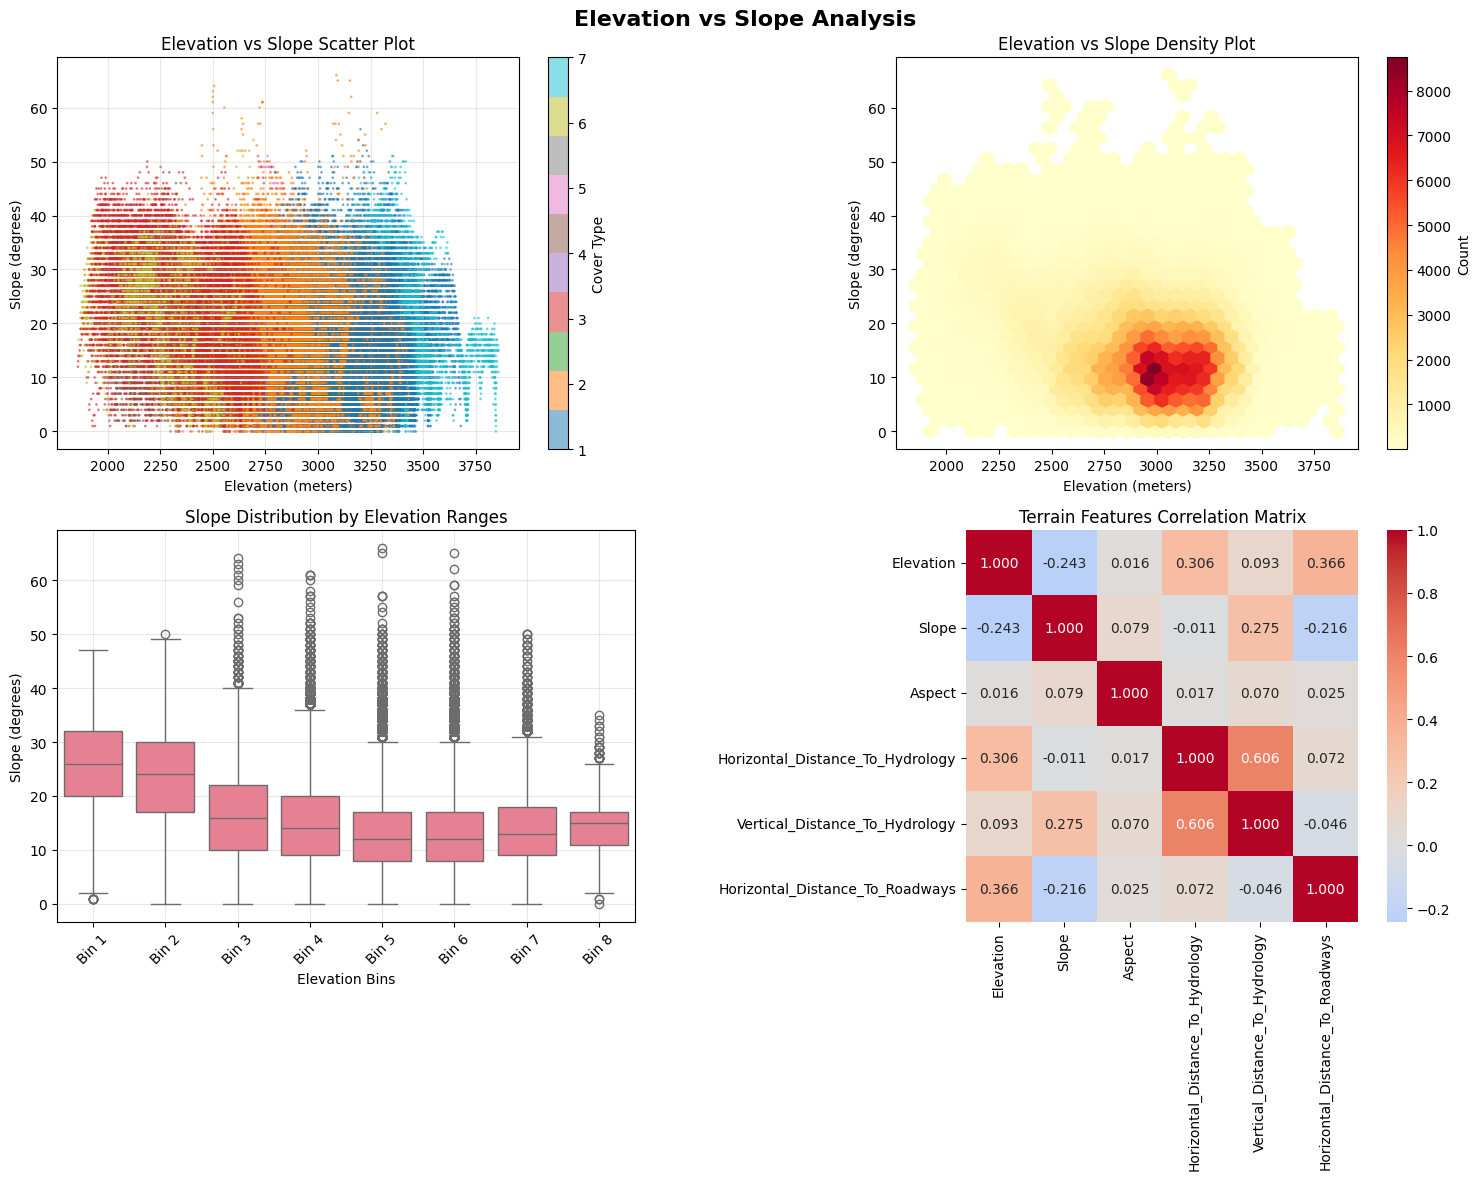


=== STATISTICAL SUMMARY ===
Basic statistics for Elevation and Slope:
           Elevation          Slope
count  581012.000000  581012.000000
mean     2959.365301      14.103704
std       279.984734       7.488242
min      1859.000000       0.000000
25%      2809.000000       9.000000
50%      2996.000000      13.000000
75%      3163.000000      18.000000
max      3858.000000      66.000000

Correlation between Elevation and Slope: -0.243

=== ELEVATION BINS ANALYSIS ===
                count   mean   std  min   max
Elevation_Bin                                
Bin 1            5121  25.88  8.47  1.0  47.0
Bin 2           18429  23.25  8.58  0.0  50.0
Bin 3           42324  16.44  8.00  0.0  64.0
Bin 4          107552  14.75  7.79  0.0  61.0
Bin 5          216299  13.08  6.82  0.0  66.0
Bin 6          168960  13.05  6.66  0.0  65.0
Bin 7           21480  14.18  7.14  0.0  50.0
Bin 8             847  14.50  5.84  0.0  35.0

=== EXTREME CASES ===
High elevation + High slope areas: 4,704

C:\Users\Raghav\AppData\Local\Temp\ipykernel_11964\171922125.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elevation_slope_stats = df.groupby('Elevation_Bin')['Slope'].agg(['count', 'mean', 'std', 'min', 'max'])


Cover Type 3: Mean Elevation = 2395m, Mean Slope = 20.8°
Cover Type 4: Mean Elevation = 2224m, Mean Slope = 18.5°
Cover Type 5: Mean Elevation = 2787m, Mean Slope = 16.6°
Cover Type 6: Mean Elevation = 2419m, Mean Slope = 19.0°
Cover Type 7: Mean Elevation = 3362m, Mean Slope = 14.3°

=== INTERPRETATION ===
📉 Negative correlation: Higher elevations tend to have gentler slopes


In [ ]:
# Plot relationship between Elevation and Slope


print("=== ELEVATION vs SLOPE ANALYSIS ===")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Elevation vs Slope Analysis', fontsize=16, fontweight='bold')

# 1. Scatter Plot - Direct relationship between elevation and slope
axes[0, 0].set_title('Elevation vs Slope Scatter Plot')
scatter = axes[0, 0].scatter(df['Elevation'], df['Slope'], alpha=0.5, c=df['Cover_Type'], 
                            cmap='tab10', s=1)
axes[0, 0].set_xlabel('Elevation (meters)')
axes[0, 0].set_ylabel('Slope (degrees)')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 0], label='Cover Type')

# 2. Hexbin Plot - Density of elevation vs slope
axes[0, 1].set_title('Elevation vs Slope Density Plot')
hb = axes[0, 1].hexbin(df['Elevation'], df['Slope'], gridsize=30, cmap='YlOrRd', mincnt=1)
axes[0, 1].set_xlabel('Elevation (meters)')
axes[0, 1].set_ylabel('Slope (degrees)')
plt.colorbar(hb, ax=axes[0, 1], label='Count')

# 3. Box Plot - Slope distribution across elevation bins
axes[1, 0].set_title('Slope Distribution by Elevation Ranges')
# Create elevation bins
df['Elevation_Bin'] = pd.cut(df['Elevation'], bins=8, labels=[f'Bin {i+1}' for i in range(8)])
sns.boxplot(data=df, x='Elevation_Bin', y='Slope', ax=axes[1, 0])
axes[1, 0].set_xlabel('Elevation Bins')
axes[1, 0].set_ylabel('Slope (degrees)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Correlation heatmap with other terrain features
axes[1, 1].set_title('Terrain Features Correlation Matrix')
terrain_features = ['Elevation', 'Slope', 'Aspect', 'Horizontal_Distance_To_Hydrology', 
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']
corr_matrix = df[terrain_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[1, 1], fmt='.3f')

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n=== STATISTICAL SUMMARY ===")
print("Basic statistics for Elevation and Slope:")
print(df[['Elevation', 'Slope']].describe())

# Correlation analysis
elevation_slope_corr = df['Elevation'].corr(df['Slope'])
print(f"\nCorrelation between Elevation and Slope: {elevation_slope_corr:.3f}")

# Elevation bins analysis
print("\n=== ELEVATION BINS ANALYSIS ===")
elevation_slope_stats = df.groupby('Elevation_Bin')['Slope'].agg(['count', 'mean', 'std', 'min', 'max'])
print(elevation_slope_stats.round(2))

# Find extreme cases
print("\n=== EXTREME CASES ===")
high_elev_high_slope = df[(df['Elevation'] > df['Elevation'].quantile(0.9)) & 
                          (df['Slope'] > df['Slope'].quantile(0.9))]
print(f"High elevation + High slope areas: {len(high_elev_high_slope):,} samples")

low_elev_high_slope = df[(df['Elevation'] < df['Elevation'].quantile(0.1)) & 
                         (df['Slope'] > df['Slope'].quantile(0.9))]
print(f"Low elevation + High slope areas: {len(low_elev_high_slope):,} samples")

high_elev_low_slope = df[(df['Elevation'] > df['Elevation'].quantile(0.9)) & 
                         (df['Slope'] < df['Slope'].quantile(0.1))]
print(f"High elevation + Low slope areas: {len(high_elev_low_slope):,} samples")

# Cover type analysis in elevation-slope space
print("\n=== COVER TYPE DISTRIBUTION IN ELEVATION-SLOPE SPACE ===")
for cover_type in sorted(df['Cover_Type'].unique()):
    subset = df[df['Cover_Type'] == cover_type]
    mean_elev = subset['Elevation'].mean()
    mean_slope = subset['Slope'].mean()
    print(f"Cover Type {cover_type}: Mean Elevation = {mean_elev:.0f}m, Mean Slope = {mean_slope:.1f}°")

# Interpretation
print("\n=== INTERPRETATION ===")
if elevation_slope_corr > 0.3:
    print("🔍 Strong positive correlation: Higher elevations tend to have steeper slopes")
elif elevation_slope_corr > 0.1:
    print("📊 Moderate positive correlation: Some tendency for higher elevations to be steeper")
elif elevation_slope_corr < -0.1:
    print("📉 Negative correlation: Higher elevations tend to have gentler slopes")
else:
    print("📈 Weak correlation: No clear relationship between elevation and slope")

# Clean up temporary column
df.drop('Elevation_Bin', axis=1, inplace=True)

=== HORIZONTAL vs VERTICAL DISTANCE TO HYDROLOGY ANALYSIS ===


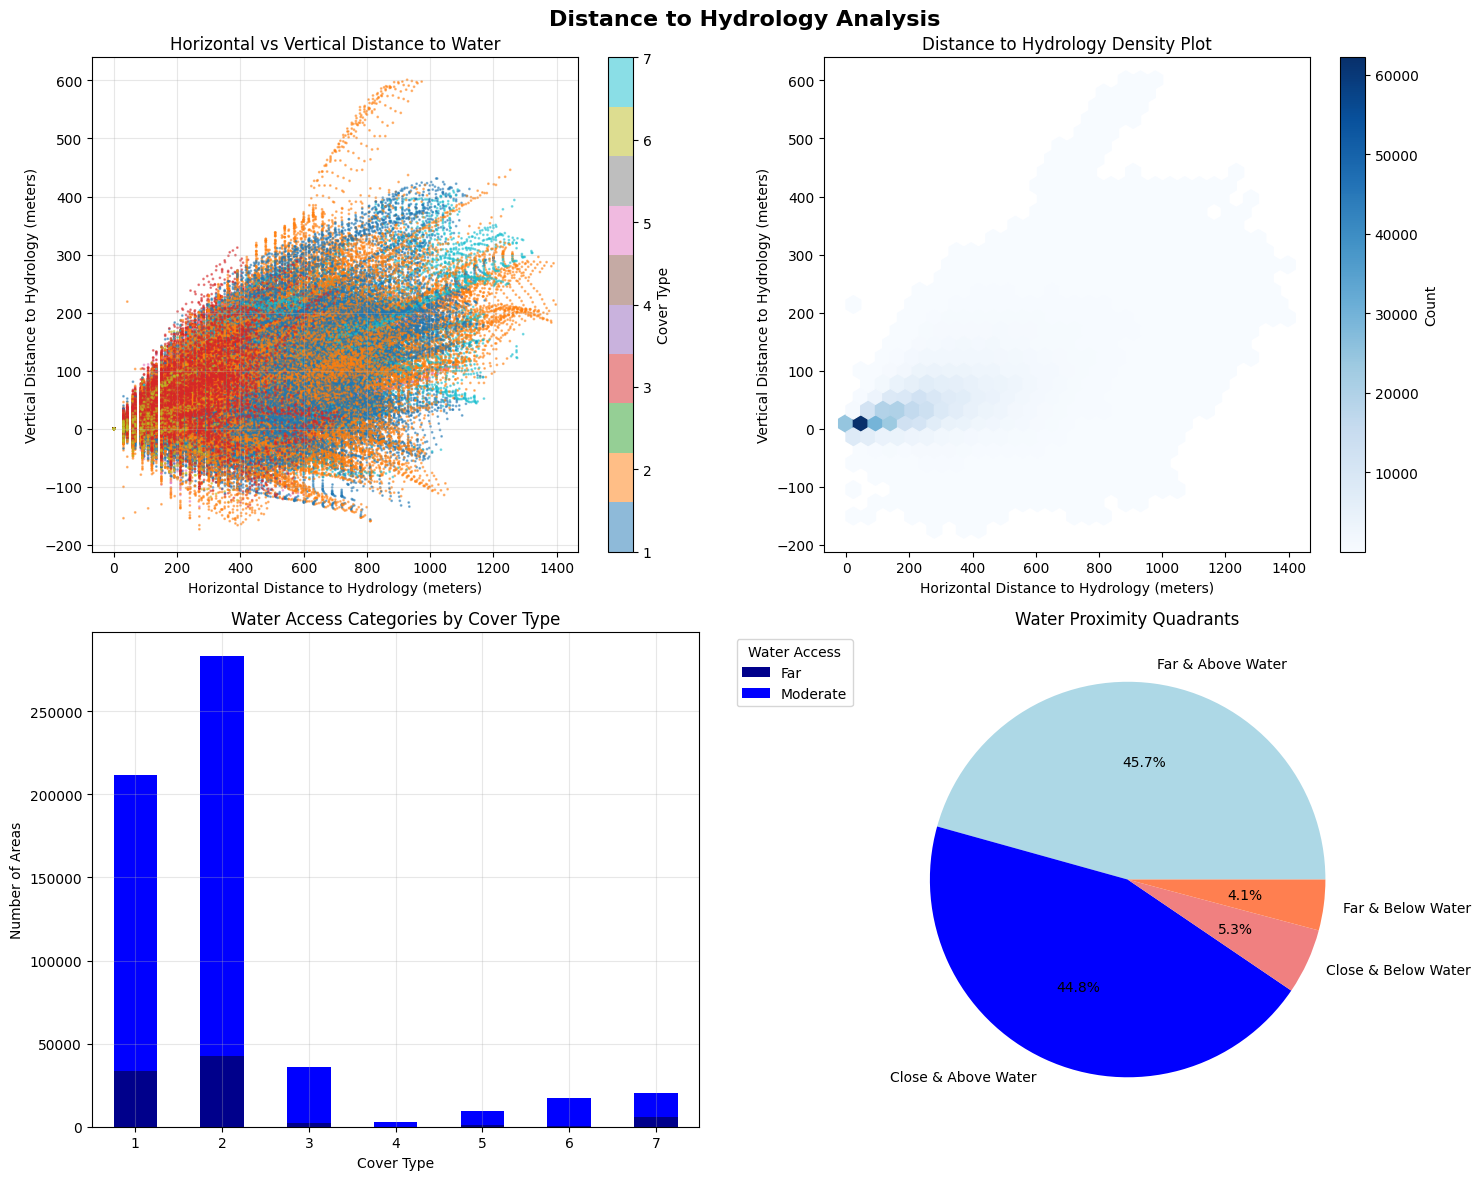


=== STATISTICAL SUMMARY ===
Hydrology distance statistics:
       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology
count                     581012.000000                   581012.000000
mean                         269.428217                       46.418855
std                          212.549356                       58.295232
min                            0.000000                     -173.000000
25%                          108.000000                        7.000000
50%                          218.000000                       30.000000
75%                          384.000000                       69.000000
max                         1397.000000                      601.000000

Correlation between Horizontal and Vertical Distance to Hydrology: 0.606

=== WATER ACCESS BY COVER TYPE ===
Water_Access    Far  Moderate
Cover_Type                   
1             0.158     0.842
2             0.150     0.850
3             0.060     0.940
4             0.023     0.977
5 

In [ ]:
# Plot relationship between Horizontal and Vertical Distance to Hydrology


print("=== HORIZONTAL vs VERTICAL DISTANCE TO HYDROLOGY ANALYSIS ===")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distance to Hydrology Analysis', fontsize=16, fontweight='bold')

# 1. Scatter Plot - Direct relationship colored by cover type
axes[0, 0].set_title('Horizontal vs Vertical Distance to Water')
scatter = axes[0, 0].scatter(df['Horizontal_Distance_To_Hydrology'], 
                            df['Vertical_Distance_To_Hydrology'], 
                            alpha=0.5, c=df['Cover_Type'], cmap='tab10', s=1)
axes[0, 0].set_xlabel('Horizontal Distance to Hydrology (meters)')
axes[0, 0].set_ylabel('Vertical Distance to Hydrology (meters)')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 0], label='Cover Type')

# 2. Hexbin Plot - Density distribution
axes[0, 1].set_title('Distance to Hydrology Density Plot')
hb = axes[0, 1].hexbin(df['Horizontal_Distance_To_Hydrology'], 
                       df['Vertical_Distance_To_Hydrology'], 
                       gridsize=30, cmap='Blues', mincnt=1)
axes[0, 1].set_xlabel('Horizontal Distance to Hydrology (meters)')
axes[0, 1].set_ylabel('Vertical Distance to Hydrology (meters)')
plt.colorbar(hb, ax=axes[0, 1], label='Count')

# 3. Distance categories analysis
axes[1, 0].set_title('Water Access Categories by Cover Type')
# Create distance categories
df['Water_Access'] = 'Far'
df.loc[(df['Horizontal_Distance_To_Hydrology'] < 100) & (abs(df['Vertical_Distance_To_Hydrology']) < 50), 'Water_Access'] = 'Very Close'
df.loc[(df['Horizontal_Distance_To_Hydrology'] < 200) & (abs(df['Vertical_Distance_To_Hydrology']) < 100), 'Water_Access'] = 'Close'
df.loc[(df['Horizontal_Distance_To_Hydrology'] < 500) & (abs(df['Vertical_Distance_To_Hydrology']) < 200), 'Water_Access'] = 'Moderate'

water_access_counts = df.groupby(['Cover_Type', 'Water_Access']).size().unstack(fill_value=0)
water_access_counts.plot(kind='bar', stacked=True, ax=axes[1, 0], 
                        color=['darkblue', 'blue', 'lightblue', 'lightcyan'])
axes[1, 0].set_xlabel('Cover Type')
axes[1, 0].set_ylabel('Number of Areas')
axes[1, 0].legend(title='Water Access', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(True, alpha=0.3)

# 4. Quadrant analysis
axes[1, 1].set_title('Water Proximity Quadrants')
h_median = df['Horizontal_Distance_To_Hydrology'].median()
v_median = df['Vertical_Distance_To_Hydrology'].median()

# Create quadrants
quadrants = []
for _, row in df.iterrows():
    h_dist = row['Horizontal_Distance_To_Hydrology']
    v_dist = row['Vertical_Distance_To_Hydrology']
    
    if h_dist <= h_median and v_dist >= 0:
        quadrants.append('Close & Above Water')
    elif h_dist <= h_median and v_dist < 0:
        quadrants.append('Close & Below Water')
    elif h_dist > h_median and v_dist >= 0:
        quadrants.append('Far & Above Water')
    else:
        quadrants.append('Far & Below Water')

df['Quadrant'] = quadrants
quadrant_counts = df['Quadrant'].value_counts()
axes[1, 1].pie(quadrant_counts.values, labels=quadrant_counts.index, autopct='%1.1f%%', 
               colors=['lightblue', 'blue', 'lightcoral', 'coral'])

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n=== STATISTICAL SUMMARY ===")
print("Hydrology distance statistics:")
hydro_stats = df[['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']].describe()
print(hydro_stats)

# Correlation analysis
hydro_corr = df['Horizontal_Distance_To_Hydrology'].corr(df['Vertical_Distance_To_Hydrology'])
print(f"\nCorrelation between Horizontal and Vertical Distance to Hydrology: {hydro_corr:.3f}")

# Water access analysis by cover type
print("\n=== WATER ACCESS BY COVER TYPE ===")
water_access_stats = df.groupby('Cover_Type')['Water_Access'].value_counts(normalize=True).unstack(fill_value=0)
print(water_access_stats.round(3))

# Extreme cases analysis
print("\n=== EXTREME WATER PROXIMITY CASES ===")
very_close_water = df[(df['Horizontal_Distance_To_Hydrology'] < 50) & 
                      (abs(df['Vertical_Distance_To_Hydrology']) < 25)]
print(f"Very close to water (< 50m horizontal, < 25m vertical): {len(very_close_water):,} areas")

far_from_water = df[(df['Horizontal_Distance_To_Hydrology'] > 1000) | 
                    (abs(df['Vertical_Distance_To_Hydrology']) > 500)]
print(f"Far from water (> 1000m horizontal OR > 500m vertical): {len(far_from_water):,} areas")

high_above_water = df[df['Vertical_Distance_To_Hydrology'] > 200]
print(f"High above water (> 200m elevation above): {len(high_above_water):,} areas")

below_water = df[df['Vertical_Distance_To_Hydrology'] < 0]
print(f"Below water level: {len(below_water):,} areas")

# Cover type preferences analysis
print("\n=== COVER TYPE WATER PREFERENCES ===")
for cover_type in sorted(df['Cover_Type'].unique()):
    subset = df[df['Cover_Type'] == cover_type]
    mean_h_dist = subset['Horizontal_Distance_To_Hydrology'].mean()
    mean_v_dist = subset['Vertical_Distance_To_Hydrology'].mean()
    print(f"Cover Type {cover_type}: Avg H-Distance = {mean_h_dist:.0f}m, Avg V-Distance = {mean_v_dist:.0f}m")

# Quadrant analysis
print("\n=== QUADRANT DISTRIBUTION ===")
quadrant_cover_type = df.groupby(['Quadrant', 'Cover_Type']).size().unstack(fill_value=0)
print("Cover type distribution across water proximity quadrants:")
print(quadrant_cover_type)

# Interpretation
print("\n=== INTERPRETATION ===")
if hydro_corr > 0.3:
    print("🔍 Strong positive correlation: Areas far horizontally are also high vertically above water")
elif hydro_corr > 0.1:
    print("📊 Moderate positive correlation: Some tendency for distant areas to be elevated above water")
elif hydro_corr < -0.1:
    print("📉 Negative correlation: Areas far horizontally tend to be closer vertically to water")
else:
    print("📈 Weak correlation: No clear relationship between horizontal and vertical distance to water")

# Ecological insights
print("\n=== ECOLOGICAL INSIGHTS ===")
riparian_areas = df[(df['Horizontal_Distance_To_Hydrology'] < 100) & 
                    (abs(df['Vertical_Distance_To_Hydrology']) < 30)]
if len(riparian_areas) > 0:
    riparian_cover_types = riparian_areas['Cover_Type'].value_counts()
    print(f"Riparian forest areas (close to water): {len(riparian_areas):,} samples")
    print("Most common cover types near water:")
    for cover_type, count in riparian_cover_types.head(3).items():
        percentage = (count / len(riparian_areas)) * 100
        print(f"  Cover Type {cover_type}: {count:,} ({percentage:.1f}%)")

# Clean up temporary columns
df.drop(['Water_Access', 'Quadrant'], axis=1, inplace=True)

=== HILLSHADE THROUGHOUT THE DAY ANALYSIS ===
Analyzing solar illumination patterns at different times of day


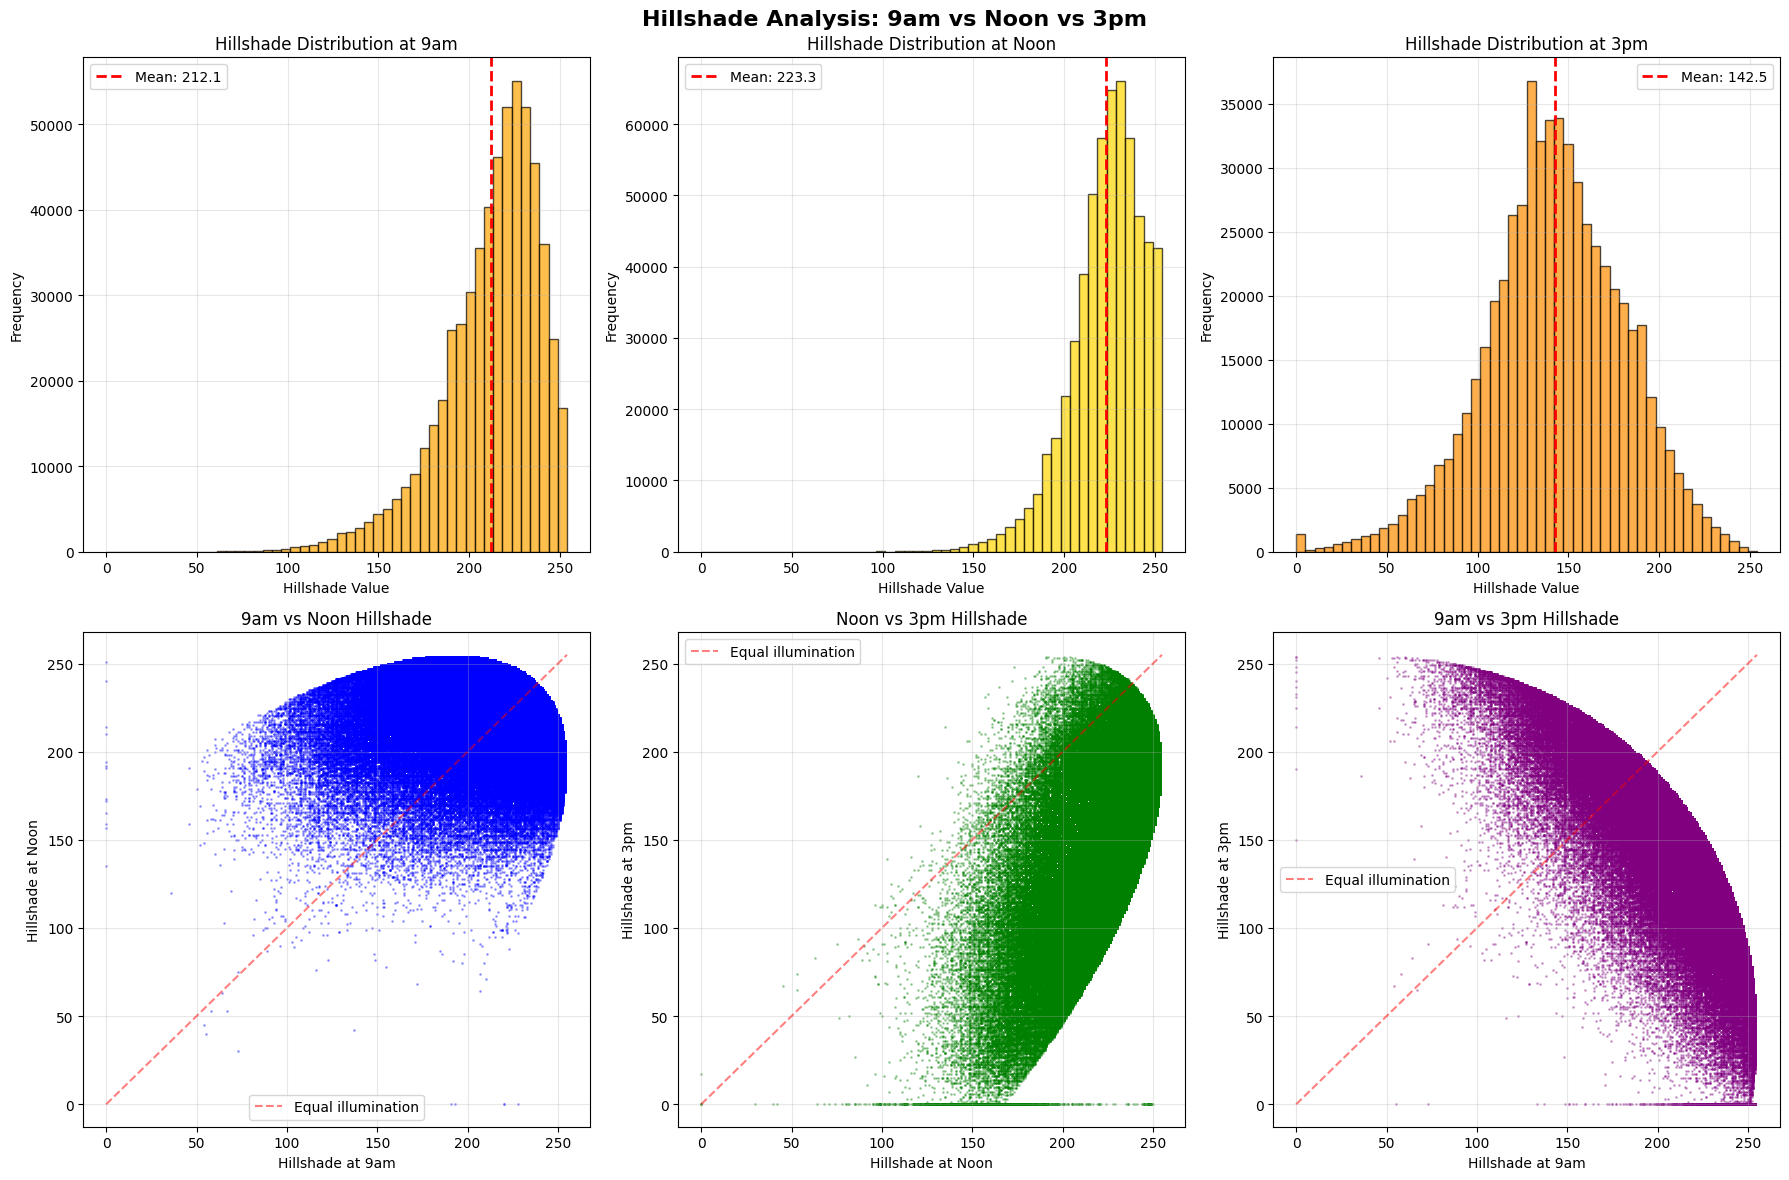

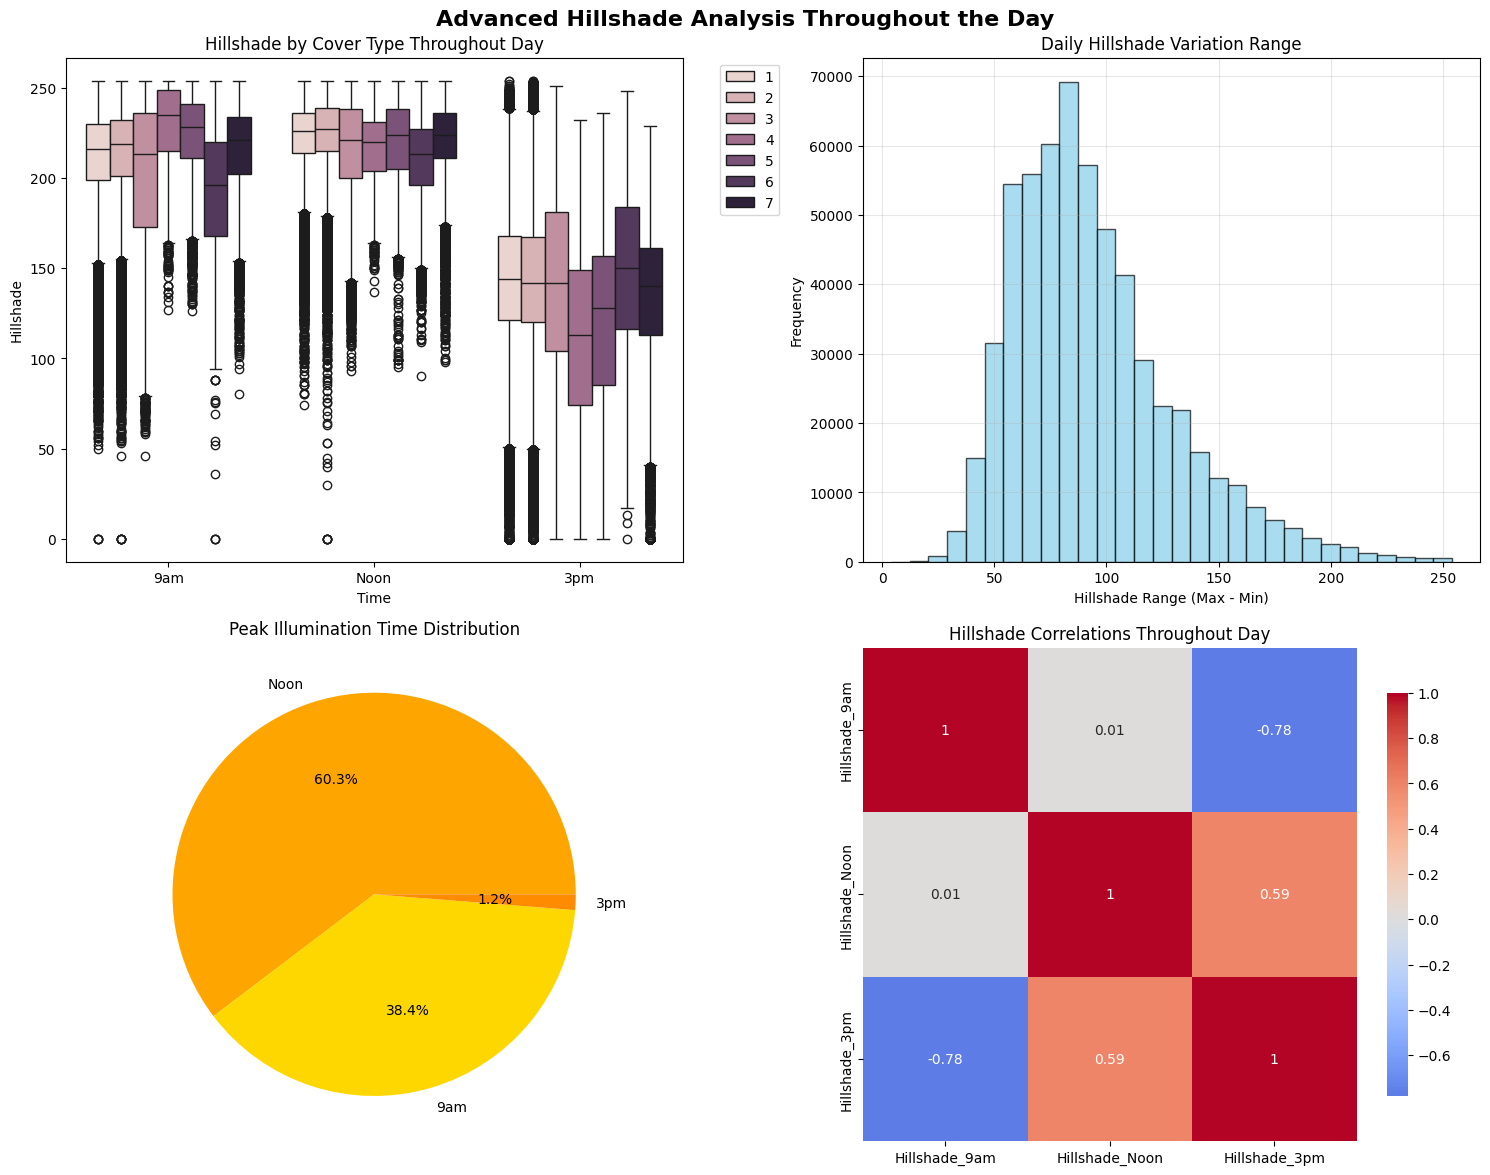


=== HILLSHADE STATISTICAL SUMMARY ===
       Hillshade_9am  Hillshade_Noon  Hillshade_3pm
count  581012.000000   581012.000000  581012.000000
mean      212.146049      223.318716     142.528263
std        26.769889       19.768697      38.274529
min         0.000000        0.000000       0.000000
25%       198.000000      213.000000     119.000000
50%       218.000000      226.000000     143.000000
75%       231.000000      237.000000     168.000000
max       254.000000      254.000000     254.000000

=== CORRELATION ANALYSIS ===
Correlations between different times:
9am vs Noon: 0.010
9am vs 3pm: -0.780
Noon vs 3pm: 0.594

=== PEAK ILLUMINATION ANALYSIS ===
When areas receive maximum illumination:
Noon: 350,505 areas (60.3%)
9am: 223,246 areas (38.4%)
3pm: 7,261 areas (1.2%)

=== ILLUMINATION STABILITY ===
Stable illumination areas (< 20 range): 148 (0.0%)
Variable illumination areas (> 100 range): 201,086 (34.6%)

=== COVER TYPE ILLUMINATION PREFERENCES ===
Cover Type 1:
  9am: 212.

In [22]:
# Plot relationship between Hillshade at 9am, Noon, and 3pm

print("=== HILLSHADE THROUGHOUT THE DAY ANALYSIS ===")
print("Analyzing solar illumination patterns at different times of day")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Hillshade Analysis: 9am vs Noon vs 3pm', fontsize=16, fontweight='bold')

# 1. Individual distributions for each time
times = ['9am', 'Noon', '3pm']
hillshade_cols = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
colors = ['orange', 'gold', 'darkorange']

for i, (time, col, color) in enumerate(zip(times, hillshade_cols, colors)):
    axes[0, i].hist(df[col], bins=50, alpha=0.7, color=color, edgecolor='black')
    axes[0, i].set_title(f'Hillshade Distribution at {time}')
    axes[0, i].set_xlabel('Hillshade Value')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)
    
    # Add statistics text
    mean_val = df[col].mean()
    std_val = df[col].std()
    axes[0, i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[0, i].legend()

# 2. Pairwise scatter plots
axes[1, 0].scatter(df['Hillshade_9am'], df['Hillshade_Noon'], alpha=0.3, s=1, c='blue')
axes[1, 0].set_title('9am vs Noon Hillshade')
axes[1, 0].set_xlabel('Hillshade at 9am')
axes[1, 0].set_ylabel('Hillshade at Noon')
axes[1, 0].plot([0, 255], [0, 255], 'r--', alpha=0.5, label='Equal illumination')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(df['Hillshade_Noon'], df['Hillshade_3pm'], alpha=0.3, s=1, c='green')
axes[1, 1].set_title('Noon vs 3pm Hillshade')
axes[1, 1].set_xlabel('Hillshade at Noon')
axes[1, 1].set_ylabel('Hillshade at 3pm')
axes[1, 1].plot([0, 255], [0, 255], 'r--', alpha=0.5, label='Equal illumination')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].scatter(df['Hillshade_9am'], df['Hillshade_3pm'], alpha=0.3, s=1, c='purple')
axes[1, 2].set_title('9am vs 3pm Hillshade')
axes[1, 2].set_xlabel('Hillshade at 9am')
axes[1, 2].set_ylabel('Hillshade at 3pm')
axes[1, 2].plot([0, 255], [0, 255], 'r--', alpha=0.5, label='Equal illumination')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis plots
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 12))
fig2.suptitle('Advanced Hillshade Analysis Throughout the Day', fontsize=16, fontweight='bold')

# 3. Box plots by cover type for each time
hillshade_data = []
cover_types = []
time_labels = []

for cover_type in sorted(df['Cover_Type'].unique()):
    for time, col in zip(times, hillshade_cols):
        subset_data = df[df['Cover_Type'] == cover_type][col]
        hillshade_data.extend(subset_data.values)
        cover_types.extend([cover_type] * len(subset_data))
        time_labels.extend([time] * len(subset_data))

hillshade_df = pd.DataFrame({
    'Hillshade': hillshade_data,
    'Cover_Type': cover_types,
    'Time': time_labels
})

# Create box plot
sns.boxplot(data=hillshade_df, x='Time', y='Hillshade', hue='Cover_Type', ax=axes2[0, 0])
axes2[0, 0].set_title('Hillshade by Cover Type Throughout Day')
axes2[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Hillshade variation (difference between max and min during day)
df['Hillshade_Range'] = df[hillshade_cols].max(axis=1) - df[hillshade_cols].min(axis=1)
df['Hillshade_Peak_Time'] = df[hillshade_cols].idxmax(axis=1)
df['Hillshade_Peak_Time'] = df['Hillshade_Peak_Time'].str.replace('Hillshade_', '')

axes2[0, 1].hist(df['Hillshade_Range'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes2[0, 1].set_title('Daily Hillshade Variation Range')
axes2[0, 1].set_xlabel('Hillshade Range (Max - Min)')
axes2[0, 1].set_ylabel('Frequency')
axes2[0, 1].grid(True, alpha=0.3)

# 5. Peak illumination time analysis
peak_time_counts = df['Hillshade_Peak_Time'].value_counts()
axes2[1, 0].pie(peak_time_counts.values, labels=peak_time_counts.index, autopct='%1.1f%%',
                colors=['orange', 'gold', 'darkorange'])
axes2[1, 0].set_title('Peak Illumination Time Distribution')

# 6. Correlation heatmap
hillshade_corr = df[hillshade_cols].corr()
sns.heatmap(hillshade_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes2[1, 1], cbar_kws={'shrink': 0.8})
axes2[1, 1].set_title('Hillshade Correlations Throughout Day')

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n=== HILLSHADE STATISTICAL SUMMARY ===")
hillshade_stats = df[hillshade_cols].describe()
print(hillshade_stats)

# Correlation analysis
print("\n=== CORRELATION ANALYSIS ===")
print("Correlations between different times:")
for i, time1 in enumerate(times):
    for j, time2 in enumerate(times):
        if i < j:
            corr = df[hillshade_cols[i]].corr(df[hillshade_cols[j]])
            print(f"{time1} vs {time2}: {corr:.3f}")

# Peak illumination analysis
print("\n=== PEAK ILLUMINATION ANALYSIS ===")
print("When areas receive maximum illumination:")
for time in peak_time_counts.index:
    count = peak_time_counts[time]
    percentage = (count / len(df)) * 100
    print(f"{time}: {count:,} areas ({percentage:.1f}%)")

# Illumination stability analysis
print("\n=== ILLUMINATION STABILITY ===")
stable_illumination = df[df['Hillshade_Range'] < 20]  # Less than 20 units variation
variable_illumination = df[df['Hillshade_Range'] > 100]  # More than 100 units variation

print(f"Stable illumination areas (< 20 range): {len(stable_illumination):,} ({len(stable_illumination)/len(df)*100:.1f}%)")
print(f"Variable illumination areas (> 100 range): {len(variable_illumination):,} ({len(variable_illumination)/len(df)*100:.1f}%)")

# Cover type preferences for illumination times
print("\n=== COVER TYPE ILLUMINATION PREFERENCES ===")
for cover_type in sorted(df['Cover_Type'].unique()):
    subset = df[df['Cover_Type'] == cover_type]
    avg_9am = subset['Hillshade_9am'].mean()
    avg_noon = subset['Hillshade_Noon'].mean()
    avg_3pm = subset['Hillshade_3pm'].mean()
    avg_range = subset['Hillshade_Range'].mean()
    
    print(f"Cover Type {cover_type}:")
    print(f"  9am: {avg_9am:.1f}, Noon: {avg_noon:.1f}, 3pm: {avg_3pm:.1f}, Range: {avg_range:.1f}")

# Extreme illumination cases
print("\n=== EXTREME ILLUMINATION CASES ===")
always_bright = df[(df['Hillshade_9am'] > 200) & (df['Hillshade_Noon'] > 200) & (df['Hillshade_3pm'] > 200)]
always_shaded = df[(df['Hillshade_9am'] < 100) & (df['Hillshade_Noon'] < 100) & (df['Hillshade_3pm'] < 100)]
noon_dominated = df[(df['Hillshade_Noon'] > df['Hillshade_9am'] + 50) & (df['Hillshade_Noon'] > df['Hillshade_3pm'] + 50)]

print(f"Always bright areas (>200 all day): {len(always_bright):,}")
print(f"Always shaded areas (<100 all day): {len(always_shaded):,}")
print(f"Noon-dominated areas (noon >50 higher): {len(noon_dominated):,}")

if len(always_bright) > 0:
    bright_cover_types = always_bright['Cover_Type'].value_counts()
    print("Always bright areas by cover type:")
    for cover_type, count in bright_cover_types.head(3).items():
        print(f"  Cover Type {cover_type}: {count:,}")

if len(always_shaded) > 0:
    shaded_cover_types = always_shaded['Cover_Type'].value_counts()
    print("Always shaded areas by cover type:")
    for cover_type, count in shaded_cover_types.head(3).items():
        print(f"  Cover Type {cover_type}: {count:,}")

# Interpretation
print("\n=== INTERPRETATION ===")
avg_morning = df['Hillshade_9am'].mean()
avg_noon = df['Hillshade_Noon'].mean()
avg_afternoon = df['Hillshade_3pm'].mean()

peak_time = 'Morning (9am)' if avg_morning == max(avg_morning, avg_noon, avg_afternoon) else \
           'Noon' if avg_noon == max(avg_morning, avg_noon, avg_afternoon) else 'Afternoon (3pm)'

print(f"🌞 Peak illumination time: {peak_time}")
print(f"📊 Average illumination: 9am={avg_morning:.1f}, Noon={avg_noon:.1f}, 3pm={avg_afternoon:.1f}")

morning_noon_corr = df['Hillshade_9am'].corr(df['Hillshade_Noon'])
if morning_noon_corr > 0.8:
    print("☀️ Strong correlation between morning and noon illumination")
elif morning_noon_corr > 0.6:
    print("🌤️ Moderate correlation between morning and noon illumination")
else:
    print("⛅ Weak correlation between morning and noon illumination")

avg_range = df['Hillshade_Range'].mean()
if avg_range > 80:
    print(f"🌄 High illumination variability throughout day (avg range: {avg_range:.1f})")
elif avg_range > 40:
    print(f"🏔️ Moderate illumination variability throughout day (avg range: {avg_range:.1f})")
else:
    print(f"🏞️ Low illumination variability throughout day (avg range: {avg_range:.1f})")

# Clean up temporary columns
df.drop(['Hillshade_Range', 'Hillshade_Peak_Time'], axis=1, inplace=True)

=== WILDERNESS AREA ANALYSIS ===
Analyzing forest cover patterns across different wilderness areas
Wilderness Area Distribution:
Wilderness Area 1: 260,796 areas (44.9%)
Wilderness Area 2: 29,884 areas (5.1%)
Wilderness Area 3: 253,364 areas (43.6%)
Wilderness Area 4: 36,968 areas (6.4%)
Wilderness Area Distribution:
Wilderness Area 1: 260,796 areas (44.9%)
Wilderness Area 2: 29,884 areas (5.1%)
Wilderness Area 3: 253,364 areas (43.6%)
Wilderness Area 4: 36,968 areas (6.4%)


C:\Users\Raghav\AppData\Local\Temp\ipykernel_11964\3877685693.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 2].boxplot(elevation_data, labels=wilderness_areas, patch_artist=True,
C:\Users\Raghav\AppData\Local\Temp\ipykernel_11964\3877685693.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(slope_data, labels=wilderness_areas, patch_artist=True,
C:\Users\Raghav\AppData\Local\Temp\ipykernel_11964\3877685693.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(hydro_data, labels=wilderness_areas, patch_artist=True,
C:\Users\Raghav\AppData\Local\Temp\ipykernel_11964\

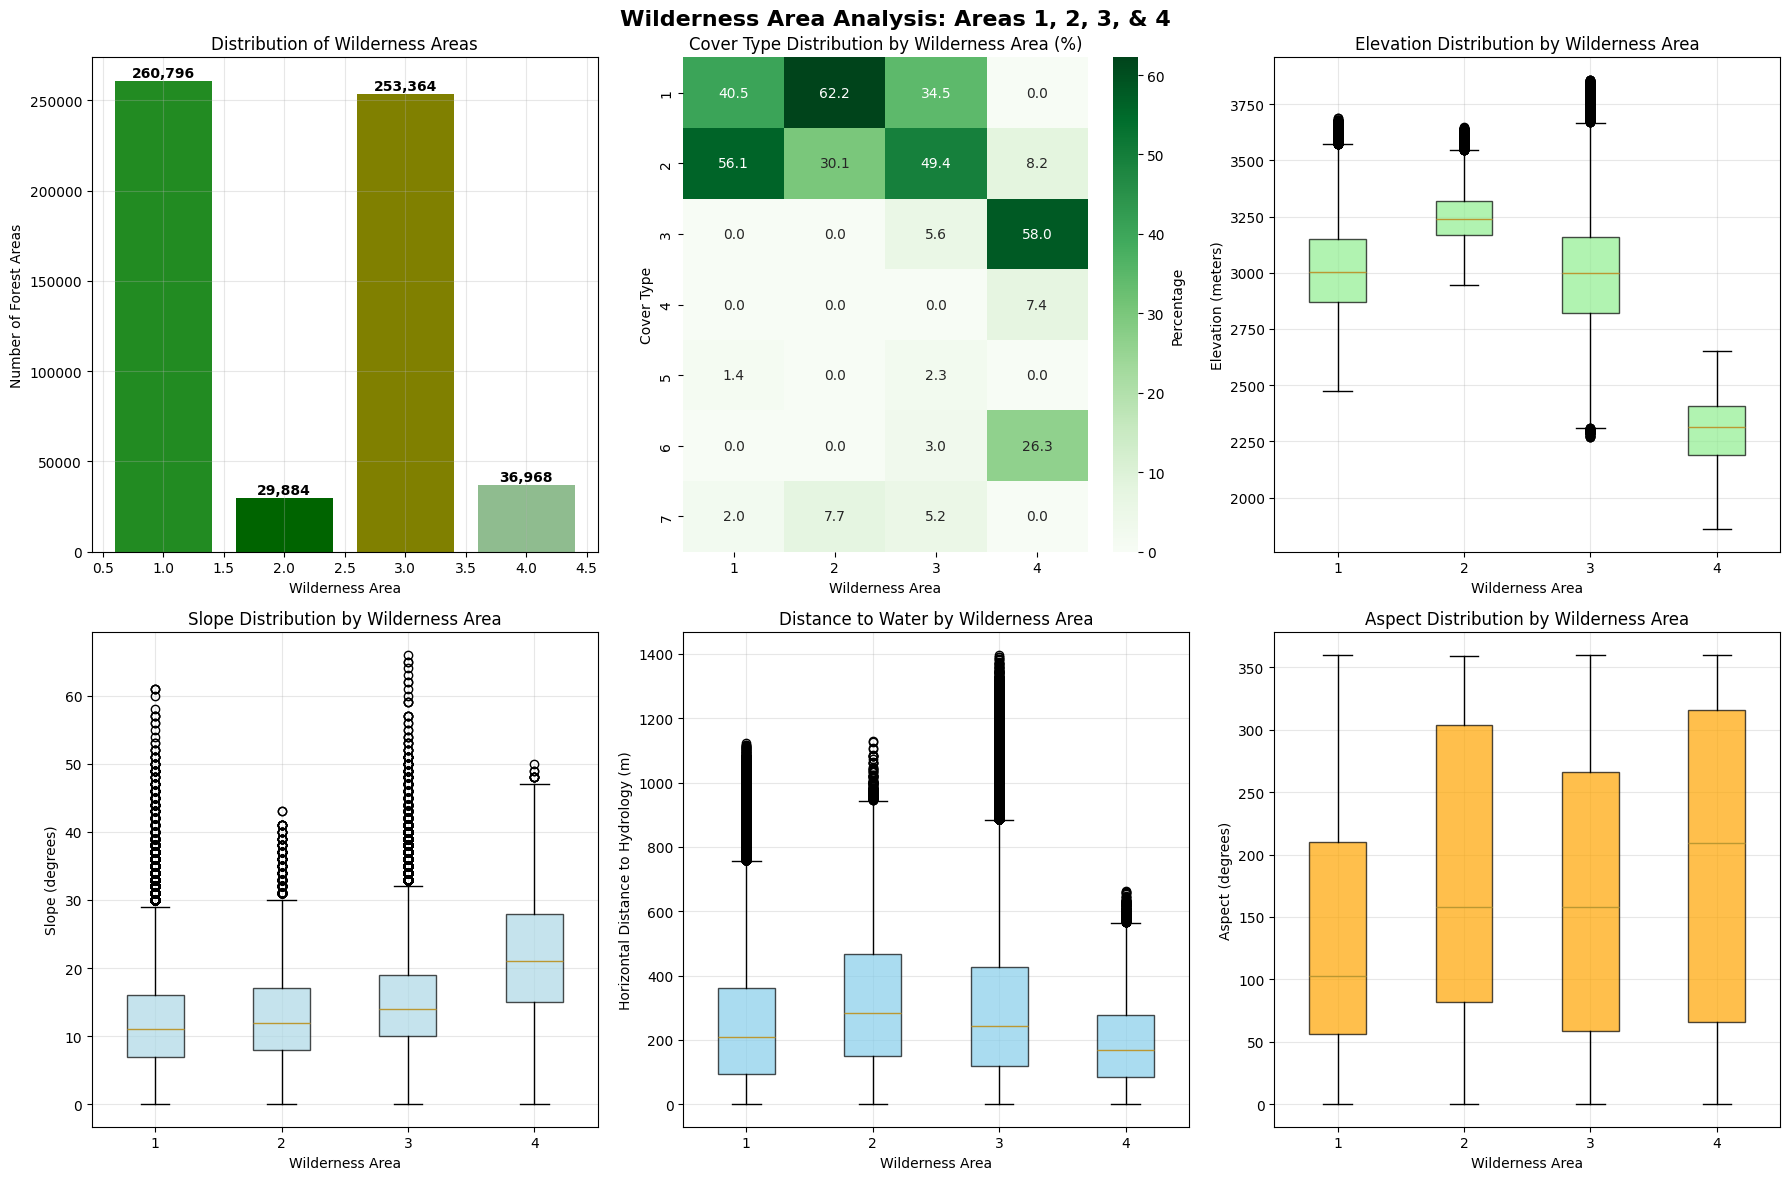

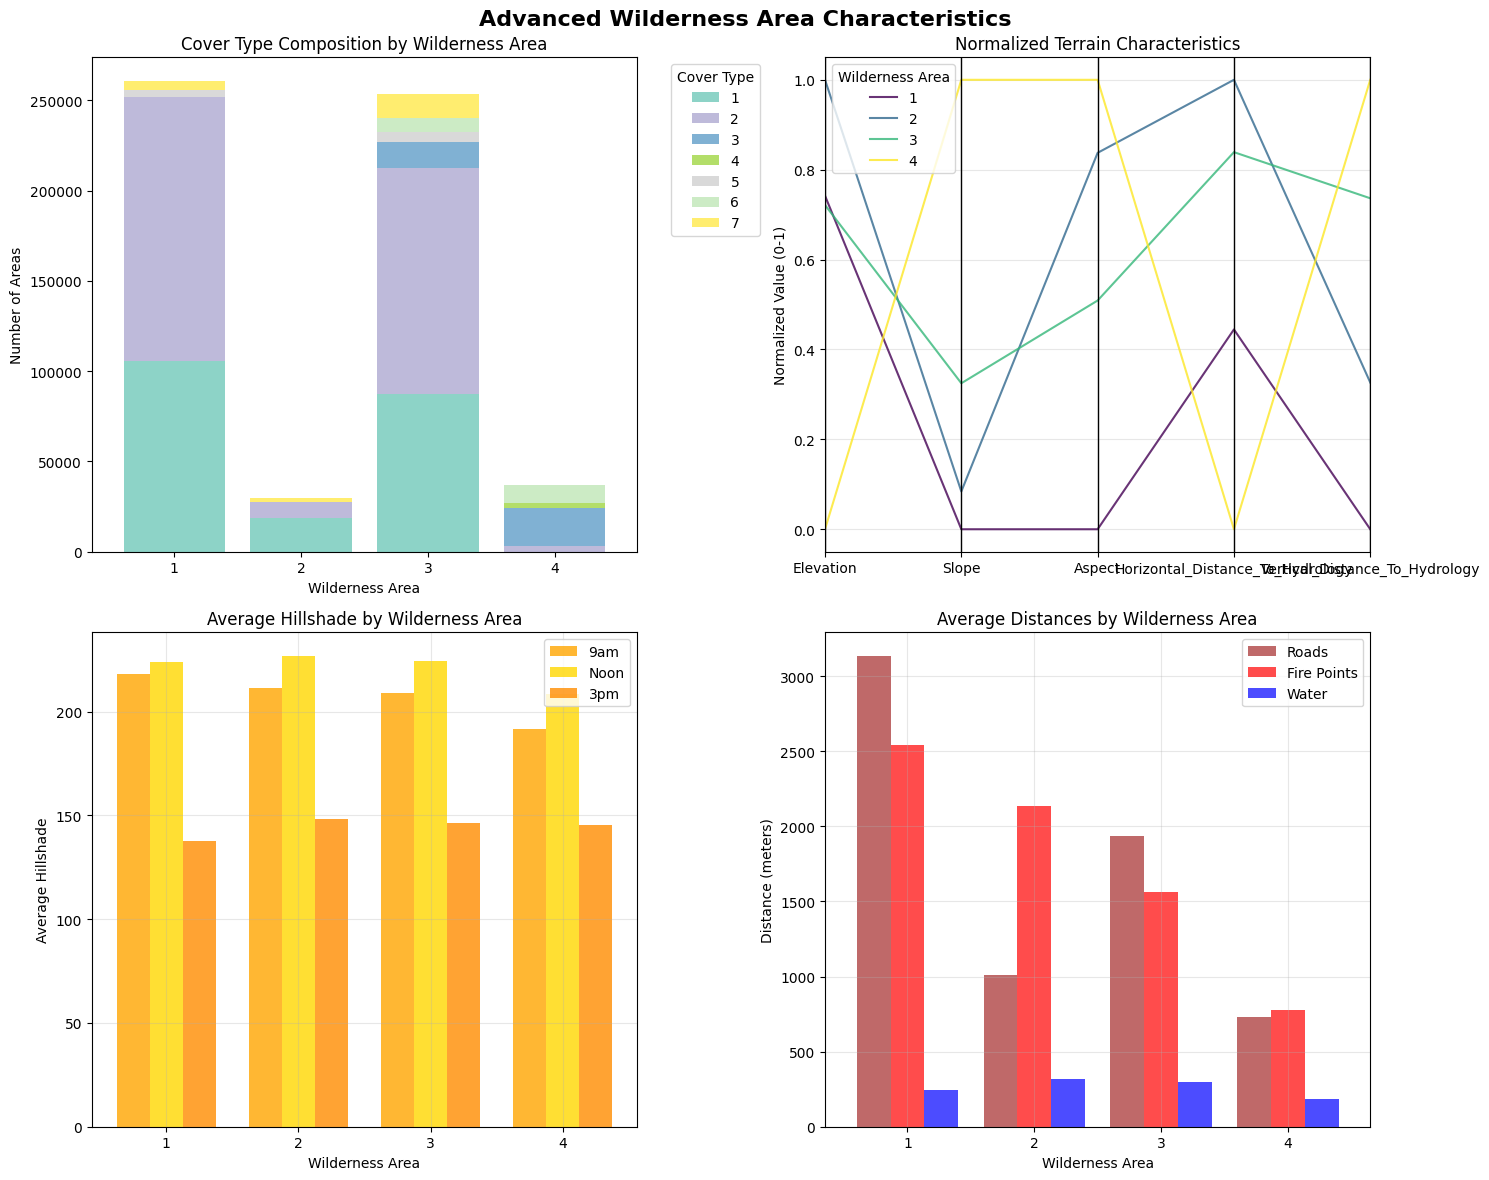


=== WILDERNESS AREA STATISTICAL SUMMARY ===

Wilderness Area 1 (260,796 samples):
  Elevation: 3000m (±200)
  Slope: 12.2° (±6.7)
  Distance to Water: 247m
  Distance to Roads: 3134m
  Distance to Fire Points: 2539m
  Top Cover Types: Type 2(146197), Type 1(105717), Type 7(5101)

Wilderness Area 2 (29,884 samples):
  Elevation: 3246m (±112)
  Slope: 12.9° (±6.4)
  Distance to Water: 320m
  Distance to Roads: 1008m
  Distance to Fire Points: 2137m
  Top Cover Types: Type 1(18595), Type 2(8985), Type 7(2304)

Wilderness Area 3 (253,364 samples):
  Elevation: 2981m (±239)
  Slope: 15.2° (±7.3)
  Distance to Water: 299m
  Distance to Roads: 1937m
  Distance to Fire Points: 1562m
  Top Cover Types: Type 2(125093), Type 1(87528), Type 3(14300)

Wilderness Area 4 (36,968 samples):
  Elevation: 2294m (±151)
  Slope: 21.4° (±8.7)
  Distance to Water: 188m
  Distance to Roads: 733m
  Distance to Fire Points: 779m
  Top Cover Types: Type 3(21454), Type 6(9741), Type 2(3026)

=== COVER TYPE SPECI

In [25]:
# Analysis of Wilderness Areas (0, 1, 2, 3)


# Ensure the DataFrame `df` is defined
# Replace the following line with the actual DataFrame loading code
# Example: df = pd.read_csv('your_dataset.csv')
if 'df' not in locals():
    raise ValueError("The DataFrame `df` is not defined. Please load your dataset into `df` before running this code.")

print("=== WILDERNESS AREA ANALYSIS ===")
print("Analyzing forest cover patterns across different wilderness areas")

# Get wilderness area columns
wilderness_cols = ['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3']

# Create wilderness area label for each row (since it's one-hot encoded)
def get_wilderness_area(row):
    for i, col in enumerate(wilderness_cols):
        if row[col] == 1:
            return i + 1  # Return 1, 2, 3, or 4
    return 0  # No wilderness area (shouldn't happen in this dataset)

df['Wilderness_Area'] = df[wilderness_cols].apply(get_wilderness_area, axis=1)

print("Wilderness Area Distribution:")
wilderness_counts = df['Wilderness_Area'].value_counts().sort_index()
for area, count in wilderness_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Wilderness Area {area}: {count:,} areas ({percentage:.1f}%)")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Wilderness Area Analysis: Areas 1, 2, 3, & 4', fontsize=16, fontweight='bold')

# 1. Wilderness area distribution
axes[0, 0].bar(wilderness_counts.index, wilderness_counts.values, 
               color=['forestgreen', 'darkgreen', 'olive', 'darkseagreen'])
axes[0, 0].set_title('Distribution of Wilderness Areas')
axes[0, 0].set_xlabel('Wilderness Area')
axes[0, 0].set_ylabel('Number of Forest Areas')
axes[0, 0].grid(True, alpha=0.3)

# Add count labels on bars
for i, v in enumerate(wilderness_counts.values):
    axes[0, 0].text(wilderness_counts.index[i], v + 500, f'{v:,}', 
                    ha='center', va='bottom', fontweight='bold')

# 2. Cover type distribution by wilderness area
cover_wilderness = pd.crosstab(df['Cover_Type'], df['Wilderness_Area'])
cover_wilderness_pct = cover_wilderness.div(cover_wilderness.sum(axis=0), axis=1) * 100

sns.heatmap(cover_wilderness_pct, annot=True, fmt='.1f', cmap='Greens', 
            ax=axes[0, 1], cbar_kws={'label': 'Percentage'})
axes[0, 1].set_title('Cover Type Distribution by Wilderness Area (%)')
axes[0, 1].set_xlabel('Wilderness Area')
axes[0, 1].set_ylabel('Cover Type')

# 3. Elevation patterns by wilderness area
wilderness_areas = sorted(df['Wilderness_Area'].unique())
elevation_data = [df[df['Wilderness_Area'] == wa]['Elevation'].values for wa in wilderness_areas]

axes[0, 2].boxplot(elevation_data, labels=wilderness_areas, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[0, 2].set_title('Elevation Distribution by Wilderness Area')
axes[0, 2].set_xlabel('Wilderness Area')
axes[0, 2].set_ylabel('Elevation (meters)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Slope patterns by wilderness area
slope_data = [df[df['Wilderness_Area'] == wa]['Slope'].values for wa in wilderness_areas]

axes[1, 0].boxplot(slope_data, labels=wilderness_areas, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1, 0].set_title('Slope Distribution by Wilderness Area')
axes[1, 0].set_xlabel('Wilderness Area')
axes[1, 0].set_ylabel('Slope (degrees)')
axes[1, 0].grid(True, alpha=0.3)

# 5. Distance to hydrology by wilderness area
hydro_data = [df[df['Wilderness_Area'] == wa]['Horizontal_Distance_To_Hydrology'].values for wa in wilderness_areas]

axes[1, 1].boxplot(hydro_data, labels=wilderness_areas, patch_artist=True,
                   boxprops=dict(facecolor='skyblue', alpha=0.7))
axes[1, 1].set_title('Distance to Water by Wilderness Area')
axes[1, 1].set_xlabel('Wilderness Area')
axes[1, 1].set_ylabel('Horizontal Distance to Hydrology (m)')
axes[1, 1].grid(True, alpha=0.3)

# 6. Aspect distribution by wilderness area
aspect_data = [df[df['Wilderness_Area'] == wa]['Aspect'].values for wa in wilderness_areas]

axes[1, 2].boxplot(aspect_data, labels=wilderness_areas, patch_artist=True,
                   boxprops=dict(facecolor='orange', alpha=0.7))
axes[1, 2].set_title('Aspect Distribution by Wilderness Area')
axes[1, 2].set_xlabel('Wilderness Area')
axes[1, 2].set_ylabel('Aspect (degrees)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional detailed analysis
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 12))
fig2.suptitle('Advanced Wilderness Area Characteristics', fontsize=16, fontweight='bold')

# 7. Cover type stacked bar chart
cover_wilderness_counts = pd.crosstab(df['Wilderness_Area'], df['Cover_Type'])
cover_wilderness_counts.plot(kind='bar', stacked=True, ax=axes2[0, 0], 
                            colormap='Set3', width=0.8)
axes2[0, 0].set_title('Cover Type Composition by Wilderness Area')
axes2[0, 0].set_xlabel('Wilderness Area')
axes2[0, 0].set_ylabel('Number of Areas')
axes2[0, 0].legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes2[0, 0].tick_params(axis='x', rotation=0)

# 8. Terrain characteristics radar chart (normalized)
wilderness_stats = df.groupby('Wilderness_Area')[['Elevation', 'Slope', 'Aspect', 
                                                  'Horizontal_Distance_To_Hydrology',
                                                  'Vertical_Distance_To_Hydrology']].mean()

# Normalize the data for radar chart
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wilderness_stats_norm = pd.DataFrame(
    scaler.fit_transform(wilderness_stats),
    index=wilderness_stats.index,
    columns=wilderness_stats.columns
)

# Create parallel coordinates plot instead of radar
from pandas.plotting import parallel_coordinates
wilderness_stats_norm_reset = wilderness_stats_norm.reset_index()
parallel_coordinates(wilderness_stats_norm_reset, 'Wilderness_Area', 
                    ax=axes2[0, 1], colormap='viridis', alpha=0.8)
axes2[0, 1].set_title('Normalized Terrain Characteristics')
axes2[0, 1].set_ylabel('Normalized Value (0-1)')
axes2[0, 1].grid(True, alpha=0.3)
axes2[0, 1].legend(title='Wilderness Area')

# 9. Hillshade comparison
hillshade_by_wilderness = df.groupby('Wilderness_Area')[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].mean()
x = np.arange(len(wilderness_areas))
width = 0.25

axes2[1, 0].bar(x - width, hillshade_by_wilderness['Hillshade_9am'], width, 
                label='9am', color='orange', alpha=0.8)
axes2[1, 0].bar(x, hillshade_by_wilderness['Hillshade_Noon'], width, 
                label='Noon', color='gold', alpha=0.8)
axes2[1, 0].bar(x + width, hillshade_by_wilderness['Hillshade_3pm'], width, 
                label='3pm', color='darkorange', alpha=0.8)

axes2[1, 0].set_title('Average Hillshade by Wilderness Area')
axes2[1, 0].set_xlabel('Wilderness Area')
axes2[1, 0].set_ylabel('Average Hillshade')
axes2[1, 0].set_xticks(x)
axes2[1, 0].set_xticklabels(wilderness_areas)
axes2[1, 0].legend()
axes2[1, 0].grid(True, alpha=0.3)

# 10. Distance patterns (roads vs fire points vs hydrology)
distance_cols = ['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 
                'Horizontal_Distance_To_Hydrology']
distance_by_wilderness = df.groupby('Wilderness_Area')[distance_cols].mean()

distance_by_wilderness.plot(kind='bar', ax=axes2[1, 1], width=0.8, 
                           color=['brown', 'red', 'blue'], alpha=0.7)
axes2[1, 1].set_title('Average Distances by Wilderness Area')
axes2[1, 1].set_xlabel('Wilderness Area')
axes2[1, 1].set_ylabel('Distance (meters)')
axes2[1, 1].legend(['Roads', 'Fire Points', 'Water'], loc='upper right')
axes2[1, 1].tick_params(axis='x', rotation=0)
axes2[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n=== WILDERNESS AREA STATISTICAL SUMMARY ===")

for area in wilderness_areas:
    subset = df[df['Wilderness_Area'] == area]
    print(f"\nWilderness Area {area} ({len(subset):,} samples):")
    print(f"  Elevation: {subset['Elevation'].mean():.0f}m (±{subset['Elevation'].std():.0f})")
    print(f"  Slope: {subset['Slope'].mean():.1f}° (±{subset['Slope'].std():.1f})")
    print(f"  Distance to Water: {subset['Horizontal_Distance_To_Hydrology'].mean():.0f}m")
    print(f"  Distance to Roads: {subset['Horizontal_Distance_To_Roadways'].mean():.0f}m")
    print(f"  Distance to Fire Points: {subset['Horizontal_Distance_To_Fire_Points'].mean():.0f}m")
    
    # Most common cover types
    top_cover_types = subset['Cover_Type'].value_counts().head(3)
    print(f"  Top Cover Types: {', '.join([f'Type {ct}({count})' for ct, count in top_cover_types.items()])}")

# Cover type specialization analysis
print("\n=== COVER TYPE SPECIALIZATION BY WILDERNESS AREA ===")
cover_wilderness_norm = cover_wilderness.div(cover_wilderness.sum(axis=1), axis=0)

for cover_type in sorted(df['Cover_Type'].unique()):
    wilderness_prefs = cover_wilderness_norm.loc[cover_type].sort_values(ascending=False)
    dominant_wilderness = wilderness_prefs.index[0]
    dominance_pct = wilderness_prefs.iloc[0] * 100
    print(f"Cover Type {cover_type}: Most common in Wilderness Area {dominant_wilderness} ({dominance_pct:.1f}%)")

# Unique characteristics analysis
print("\n=== UNIQUE WILDERNESS CHARACTERISTICS ===")

# Find most distinctive features for each wilderness area
wilderness_means = df.groupby('Wilderness_Area').mean()
overall_means = df.mean()

for area in wilderness_areas:
    print(f"\nWilderness Area {area} distinctive features:")
    area_means = wilderness_means.loc[area]
    
    # Calculate z-scores to find distinctive features
    differences = {}
    for feature in ['Elevation', 'Slope', 'Aspect', 'Horizontal_Distance_To_Hydrology',
                   'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']:
        if feature in area_means.index and feature in overall_means.index:
            diff = abs(area_means[feature] - overall_means[feature])
            std = df[feature].std()
            z_score = diff / std if std > 0 else 0
            differences[feature] = z_score
    
    # Sort by distinctiveness
    sorted_features = sorted(differences.items(), key=lambda x: x[1], reverse=True)
    
    for feature, z_score in sorted_features[:3]:  # Top 3 distinctive features
        area_val = area_means[feature]
        overall_val = overall_means[feature]
        direction = "higher" if area_val > overall_val else "lower"
        print(f"  {feature}: {area_val:.0f} ({direction} than average {overall_val:.0f}, z-score: {z_score:.2f})")

# Accessibility analysis
print("\n=== WILDERNESS ACCESSIBILITY ANALYSIS ===")
for area in wilderness_areas:
    subset = df[df['Wilderness_Area'] == area]
    road_dist = subset['Horizontal_Distance_To_Roadways'].mean()
    
    if road_dist < 1000:
        accessibility = "High (close to roads)"
    elif road_dist < 2500:
        accessibility = "Moderate"
    else:
        accessibility = "Low (remote)"
    
    print(f"Wilderness Area {area}: {accessibility} - Avg road distance: {road_dist:.0f}m")

# Ecological diversity analysis
print("\n=== ECOLOGICAL DIVERSITY ANALYSIS ===")
for area in wilderness_areas:
    subset = df[df['Wilderness_Area'] == area]
    cover_type_counts = subset['Cover_Type'].value_counts()
    diversity = len(cover_type_counts)  # Simple diversity measure
    
    # Calculate evenness (how evenly distributed the cover types are)
    proportions = cover_type_counts / len(subset)
    evenness = -(proportions * np.log(proportions + 1e-10)).sum()  # Shannon entropy
    
    print(f"Wilderness Area {area}: {diversity} cover types, diversity index: {evenness:.2f}")

# Conservation priority analysis
print("\n=== CONSERVATION INSIGHTS ===")
for area in wilderness_areas:
    subset = df[df['Wilderness_Area'] == area]
    
    # Unique habitat combinations
    unique_combinations = len(subset.groupby(['Cover_Type', 'Elevation', 'Slope']).size())
    
    # Rare cover types (less than 5% of wilderness area)
    cover_type_props = subset['Cover_Type'].value_counts(normalize=True)
    rare_types = cover_type_props[cover_type_props < 0.05]
    
    print(f"Wilderness Area {area}:")
    print(f"  Unique habitat combinations: {unique_combinations}")
    if len(rare_types) > 0:
        print(f"  Rare cover types: {list(rare_types.index)}")
    else:
        print(f"  No rare cover types identified")

# Clean up temporary column
df.drop('Wilderness_Area', axis=1, inplace=True)

print("\n=== INTERPRETATION SUMMARY ===")
print("🏔️  Each wilderness area shows distinct topographical and ecological characteristics")
print("🌲 Cover type distributions vary significantly between wilderness areas")
print("📍 Accessibility and remoteness levels differ substantially")
print("🔍 Some wilderness areas specialize in specific forest cover types")
print("💡 This analysis helps identify unique conservation values of each wilderness area")